In [2]:
import pandas as pd

In [3]:
data = {
    "Student": ["A", "B", "C", "D", "E"],
    "Major": ["CS", "CS", "Math", "Math", "CS"],
    "Score": [85, 90, 78, 88, 92]}

df = pd.DataFrame(data)
df.groupby("Major")["Score"].mean()

Major
CS      89.0
Math    83.0
Name: Score, dtype: float64

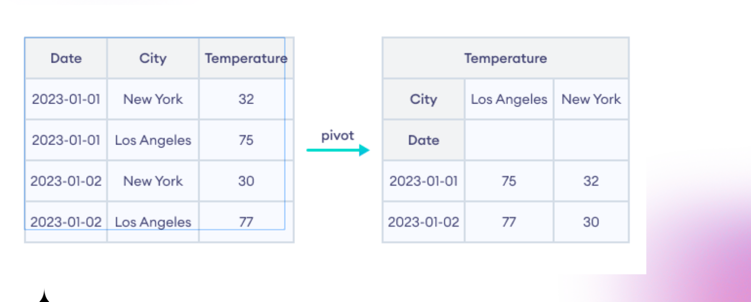

In [4]:
data = {
    "Date": ["2023-01-01", "2023-01-01", "2023-01-02", "2023-01-02"],
    "City": ["New York", "Los Angeles", "New York", "Los Angeles"],
    "Temperature": [32, 75, 30, 77]
}

df = pd.DataFrame(data)
df

,Date,City,Temperature
0,2023-01-01,New York,32
1,2023-01-01,Los Angeles,75
2,2023-01-02,New York,30
3,2023-01-02,Los Angeles,77


In [5]:
pd.pivot_table(df, index="Date", columns="City", values="Temperature")

City,Los Angeles,New York
Date,,
2023-01-01,75.0,32.0
2023-01-02,77.0,30.0


In [6]:
sales = pd.DataFrame({
    "Month": ["Jan", "Jan", "Feb", "Feb"],
    "Product": ["A", "B", "A", "B"],
    "Revenue": [100, 150, 120, 180]
})

sales

,Month,Product,Revenue
0,Jan,A,100
1,Jan,B,150
2,Feb,A,120
3,Feb,B,180


In [7]:
print(pd.pivot_table(sales, index="Month", columns="Product", values="Revenue", aggfunc="sum"))

Product    A    B
Month            
Feb      120  180
Jan      100  150


In [32]:
import pandas as pd

# Датасет студентов
students = pd.DataFrame({
    "StudentID": [1, 2, 3, 4],
    "Name": ["Alice", "Bob", "Charlie", "David"]
})

# Датасет оценок
grades = pd.DataFrame({
    "ID": [3, 4, 5, 6],
    "Grade": ["A", "B", "C", "D"]
})

# print("Students:\n", students)
# print("\nGrades:\n", grades)

In [33]:
students

,StudentID,Name
0,1,Alice
1,2,Bob
2,3,Charlie
3,4,David


In [34]:
grades

,ID,Grade
0,3,A
1,4,B
2,5,C
3,6,D


In [49]:
inner_merge = pd.merge(students, grades, left_on='StudentID', right_on='ID', how="left")
inner_merge

,StudentID,Name,ID,Grade
0,1,Alice,NaN,NaN
1,2,Bob,NaN,NaN
2,3,Charlie,3.0,A
3,4,David,4.0,B


In [11]:
data = {
    "Date": pd.date_range("2024-01-01", periods=5),
    "Visitors": [120, 150, 130, 170, 160]
}

df = pd.DataFrame(data)
df.set_index("Date", inplace=True)
df['expanding_avg'] = df['Visitors'].expanding().mean()
df

,Visitors,expanding_avg
Date,,
2024-01-01,120,120.000000
2024-01-02,150,135.000000
2024-01-03,130,133.333333
2024-01-04,170,142.500000
2024-01-05,160,146.000000


In [12]:
dates = pd.date_range("2024-01-01", periods=5)
steps = pd.Series([8000, 9500, 7000, 11000, 10000], name='Steps', index=dates)
steps

2024-01-01     8000
2024-01-02     9500
2024-01-03     7000
2024-01-04    11000
2024-01-05    10000
Freq: D, Name: Steps, dtype: int64

In [13]:
steps["2024-01-03"]

np.int64(7000)

In [14]:
steps["2024-01-02":"2024-01-04"]

2024-01-02     9500
2024-01-03     7000
2024-01-04    11000
Freq: D, Name: Steps, dtype: int64

In [15]:
steps.resample("2D").mean()

2024-01-01     8750.0
2024-01-03     9000.0
2024-01-05    10000.0
Freq: 2D, Name: Steps, dtype: float64

In [16]:
steps

2024-01-01     8000
2024-01-02     9500
2024-01-03     7000
2024-01-04    11000
2024-01-05    10000
Freq: D, Name: Steps, dtype: int64

In [17]:
steps.rolling(window=2).mean()
# находит среднее значение за посление Window дней

2024-01-01        NaN
2024-01-02     8750.0
2024-01-03     8250.0
2024-01-04     9000.0
2024-01-05    10500.0
Freq: D, Name: Steps, dtype: float64

In [18]:
steps.expanding().mean()
# находит среднее значение я начала отчета до того дня

2024-01-01    8000.000000
2024-01-02    8750.000000
2024-01-03    8166.666667
2024-01-04    8875.000000
2024-01-05    9100.000000
Freq: D, Name: Steps, dtype: float64